<a href="https://colab.research.google.com/github/vishnubanna/learningmachinelearning/blob/master/fully_convolutional_LocalNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#pip install tensorflow==2.0.0-beta1 

In [0]:
pip install tensorflow-gpu==2.0.0-beta1

     |████████████████████████████████| 348.9MB 76kB/s 
     |████████████████████████████████| 3.1MB 32.3MB/s 
     |████████████████████████████████| 501kB 53.7MB/s 


In [0]:
!rm *

rm: cannot remove 'sample_data': Is a directory


In [0]:
from google.colab import files 
uploads = files.upload()

Saving cucumber_1.jpg to cucumber_1.jpg
Saving cucumber_1.xml to cucumber_1.xml
Saving cucumber_2.jpg to cucumber_2.jpg
Saving cucumber_2.xml to cucumber_2.xml
Saving cucumber_3.jpg to cucumber_3.jpg
Saving cucumber_3.xml to cucumber_3.xml
Saving cucumber_4.jpg to cucumber_4.jpg
Saving cucumber_4.xml to cucumber_4.xml
Saving cucumber_5.jpg to cucumber_5.jpg
Saving cucumber_5.xml to cucumber_5.xml
Saving cucumber_6.jpg to cucumber_6.jpg
Saving cucumber_6.xml to cucumber_6.xml
Saving cucumber_7.jpg to cucumber_7.jpg
Saving cucumber_7.xml to cucumber_7.xml
Saving cucumber_8.jpg to cucumber_8.jpg
Saving cucumber_8.xml to cucumber_8.xml
Saving cucumber_9.jpg to cucumber_9.jpg
Saving cucumber_9.xml to cucumber_9.xml
Saving cucumber_10.jpg to cucumber_10.jpg
Saving cucumber_10.xml to cucumber_10.xml
Saving cucumber_11.jpg to cucumber_11.jpg
Saving cucumber_11.xml to cucumber_11.xml
Saving cucumber_12.jpg to cucumber_12.jpg
Saving cucumber_12.xml to cucumber_12.xml
Saving cucumber_13.jpg to cu

In [0]:
# from google.colab import files 
# uploads2 = files.upload()

In [0]:
from google.colab import files 
uploads2 = files.upload()


Saving 600_dxjtwnobht_seminiscucumbermaresa01.jpg to 600_dxjtwnobht_seminiscucumbermaresa01.jpg
Saving 1044344.jpg to 1044344.jpg
Saving aydin-siyahi-patlican-tohumu-700x600.jpg to aydin-siyahi-patlican-tohumu-700x600.jpg
Saving C9wihfnW0AEcgp_.jpg to C9wihfnW0AEcgp_.jpg
Saving DSC03178.jpg to DSC03178.jpg
Saving hiyar-altin-oldu-419264.jpg to hiyar-altin-oldu-419264.jpg
Saving images (1).jpg to images (1).jpg
Saving images (2).jpg to images (2).jpg
Saving images (3).jpg to images (3).jpg
Saving images.jpg to images.jpg
Saving indir (1).jpg to indir (1).jpg
Saving indir (2).jpg to indir (2).jpg
Saving indir.jpg to indir.jpg
Saving its-not-what-it-seems-akrilik-boyama-hikaru-cho-japonya-bigumigu-8-1-1200x470.jpg to its-not-what-it-seems-akrilik-boyama-hikaru-cho-japonya-bigumigu-8-1-1200x470.jpg
Saving jF1TNFg8_400x400.jpg to jF1TNFg8_400x400.jpg
Saving sebze16.jpg to sebze16.jpg


In [0]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
import pandas as pd
from sklearn import preprocessing, svm
from math import *
from time import sleep
from sklearn.model_selection import cross_validate, train_test_split

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
def xmlread(file):   
    keys = ['filename', 'xmin', 'ymin', 'xmax', 'ymax', 'xmid', 'ymid', 'h', 'w']
    file = file.decode()
    file = file.split('\n')
    useful = [file[2]]+file[19 : 23]


    for i in range(len(useful)):
        useful[i] = useful[i].replace("\t","")
        useful[i] = useful[i].replace("/","")
        useful[i] = useful[i].replace("<"+keys[0]+">","")
        useful[i] = useful[i].replace("<"+keys[1]+">","")
        useful[i] = useful[i].replace("<"+keys[2]+">","")
        useful[i] = useful[i].replace("<"+keys[3]+">","")
        useful[i] = useful[i].replace("<"+keys[4]+">","")
        
        
    xmid = (int(useful[1]) + int(useful[3]))/2.
    ymid = (int(useful[2]) + int(useful[4]))/2.
    
    h = int(useful[4]) - int(useful[2])
    w = int(useful[3]) - int(useful[1])

    val = {keys[0]:useful[0],
          keys[5]:int(xmid),
          keys[6]:int(ymid),
          keys[7]:h,
          keys[8]:w}

    bpnt = [int(xmid)/227, int(ymid)/227, h/227, w/227]
    return bpnt


def getdata(uploads):
    dset = []
    files = list(uploads.keys())
    #print(files)
    for i in range(0,len(files), 2):
        j = i + 1
        #print(files[i], files[j])
        img = cv2.imread(files[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #plt.imshow(img) 
        if 'cucumber' in files[i]:
            #classif = np.array([1, 0, 0])
            classif = 1
            location = xmlread(uploads[files[j]])
            #classif = np.array([[1], [0], [0]])
        elif 'mushroom' in files[i]:
            #classif = np.array([0, 0, 1])
            classif = 3
            location = xmlread(uploads[files[j]])
            #classif = np.array([[0], [0], [1]])
        elif 'eggplant' in files[i]:
            #classif = np.array([0, 1, 0])
            classif = 2
            location = xmlread(uploads[files[j]])
            #classif = np.array([[0], [1], [0]])
        else:
            #classif = [0, 0, 0]
            img = cv2.resize(img,(227,227))
            classif = 0
            location = [0, 0, 0, 0]
        vec = [np.array(img)/255, classif, np.reshape(location, (1,1,4))]
        dset.append(vec)
    return dset

data = getdata(uploads)
#print(data[1])

shuffle(data)
shuffle(data)

#print(data)

trainlen = int(len(data)*0.9)
datan = np.array(data)
print(datan.shape)

train = datan[:trainlen]
test = datan[trainlen:]

xtrain = train[:, 0]
xtest = test[:, 0]

xtrain = np.array(xtrain.tolist())
xtest = np.array(xtest.tolist())

classtr = train[:, 1]
classte = test[:, 1]

classtr = np.array(classtr.tolist())
classtr = classtr.flatten()
classte = np.array(classte.tolist())
classte = classte.flatten()


onehot_encoder = OneHotEncoder(sparse=False)

print(classtr, classte)

boxtr = train[:, 2]
boxte = test[:, 2]

boxtr = np.array(boxtr.tolist())
boxte = np.array(boxte.tolist())
xtrain = xtrain[:, :, :, np.newaxis]
xtest = xtest[:, :, :, np.newaxis]

print(xtrain.shape)
print(xtest.shape)


(245, 3)
[1 2 1 2 0 0 0 0 2 0 0 3 0 3 2 3 2 0 3 3 3 2 3 0 0 0 0 3 1 1 0 3 2 3 1 0 2
 1 2 2 0 2 3 0 3 2 1 3 1 0 1 0 2 0 3 0 3 1 2 0 0 2 1 1 3 3 1 3 3 1 3 2 1 3
 3 3 3 2 2 2 2 1 2 1 3 3 0 1 0 1 2 2 2 2 2 1 3 1 0 3 3 0 3 1 2 2 3 0 3 3 2
 0 0 2 1 1 2 1 1 1 1 1 1 3 0 2 3 0 0 2 2 3 0 0 2 0 1 3 1 2 0 0 0 1 3 2 1 1
 2 0 2 0 3 1 2 1 1 0 3 3 1 0 0 1 2 1 1 1 2 1 2 3 3 0 3 0 1 1 3 2 1 2 0 3 2
 3 0 1 2 3 2 2 2 0 3 2 0 3 1 3 0 3 1 2 0 2 3 2 1 0 1 2 1 2 1 0 2 3 0 2] [1 3 0 0 0 2 3 2 3 0 1 2 1 3 2 1 3 1 1 0 1 3 1 3 1]
(220, 227, 227, 1)
(25, 227, 227, 1)


In [0]:
import tensorflow as tf
import tensorflow.keras as ks
from tensorflow.keras import Model
from tensorflow.keras.layers import *

class LocalNet(Model):
    @staticmethod
    def main_net(inputs):
        x = Conv2D(filters = 96, kernel_size = (11,11), strides = (4,4), padding = "same", activation = 'relu')(inputs)
        x = MaxPool2D(pool_size = (3,3), strides = (2,2), padding = "same")(x)
        x = BatchNormalization()(x)
        
        x = Conv2D(filters = 256, kernel_size = (5,5), strides = (1,1), padding = "same", activation = 'relu')(x)
        x = MaxPool2D(pool_size = (3,3), strides = (2,2), padding = "same")(x)
        x = BatchNormalization()(x)
        
        x = Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = "same", activation = 'relu')(x)
        x = Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu')(x)
        x = Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu')(x)
        x = MaxPool2D(pool_size = (3,3), strides = (2,2), padding = 'same')(x)
        x = BatchNormalization()(x)
        
        #x = Flatten()(x)
        
#         x = Dense(units = 4096,activation = 'relu')(x)
#         x = Dropout(0.4)(x)
        
#         x = Dense(units = 4096,activation = 'relu')(x)
#         x = Dropout(0.4)(x)
        
#         x = Dense(units = 1000,activation = 'relu')(x)
#         x = Dropout(0.4)(x)

        return x
    
    @staticmethod
    def build_class(x):
        #sh = tf.shape(x)[:2]
        x = Conv2D(filters = 4096, kernel_size = (8, 8), activation = 'relu')(x)
 
        x = Dropout(0.3)(x)
        #sh = tf.shape(x)[:2]
        x = Conv2D(filters = 4096, kernel_size = (1, 1), activation = 'relu')(x)

        x = Dropout(0.3)(x)
        #sh = tf.shape(x)[:2]
        x = Conv2D(filters = 1000, kernel_size = (1, 1), activation = 'relu')(x)
        x = Dropout(0.3)(x)
        
        #shape = tf.shape(x)[:2]
        x = Conv2D(filters = 4, kernel_size = (1, 1), activation = 'softmax', name = 'classif')(x)
        return x
    
    @staticmethod
    def build_box(x):   
        #x = Flatten()(x)
        
        #x = Dense(units = 1024,activation = 'relu')(x)
        x = Conv2D(filters = 2048, kernel_size = (8, 8), activation = 'relu')(x)
        x = Dropout(0.2)(x)
        
        #x = Dense(units = 512,activation = 'relu')(x)
        x = Conv2D(filters = 1024, kernel_size = (1, 1), activation = 'relu')(x)
        x = Dropout(0.2)(x)
        
        #x = Dense(units = 256,activation = 'relu')(x)
        x = Conv2D(filters = 512, kernel_size = (1, 1), activation = 'relu')(x)
        x = Dropout(0.2)(x)
        
        #x = Dense(units = 4, name = 'box')(x)
        x = Conv2D(filters = 4, kernel_size = (1, 1), activation = 'linear', name = 'box')(x)
        return x
    
    @staticmethod
    def build(h, w):
        
        inputShape = (h, w, 1)
        
        inputimg = Input(shape = inputShape)
        midval = LocalNet.main_net(inputimg)
        classif = LocalNet.build_class(midval)
        box = LocalNet.build_box(midval)
        
        model = Model(inputs = inputimg, 
                     outputs = [classif, box],
                     name = 'LocalNet')
        
        return model
        
model = LocalNet.build(227, 227)
model.summary()

Model: "LocalNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 227, 227, 1) 0                                            
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 57, 57, 96)   11712       input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 29, 29, 96)   0           conv2d_22[0][0]                  
__________________________________________________________________________________________________
batch_normalization_6 (BatchNor (None, 29, 29, 96)   384         max_pooling2d_6[0][0]            
___________________________________________________________________________________________

In [0]:
#hyperparameters 
EPOCHS = 50 # with nothing 15 w/o nothing 30
lr = 0.000006
step_size = 4
op_classes = 3
op_boxvals = 4
fc_nodes1 = 4096
fc_nodes2 = 4096
batchSize = 20
img_size = 227

classif = 'classif'
boxif = 'box'

losses = {'classif': ks.losses.SparseCategoricalCrossentropy(),
          'box': ks.losses.MeanSquaredError()}

lossWeights = {'classif': 10.0, 'box': 0.5}

#test = ks.losses.MeanSquaredError()
#listmets = None
listmets = {'classif': ks.losses.SparseCategoricalCrossentropy(), 'box': ks.losses.MeanSquaredError()}
opt = ks.optimizers.Adam(learning_rate = lr)

model.compile(optimizer = opt, loss = losses, loss_weights = lossWeights, metrics = ['accuracy'])


In [0]:
validationdata = (xtest, {'classif': classte, 'box':boxte})
model.fit(x = xtrain, y = {'classif': classtr, 'box': boxtr}, validation_data = validationdata , batch_size = step_size, epochs = EPOCHS, verbose = 1)

#fix losses

Train on 220 samples, validate on 25 samples
Epoch 1/50
220/220 [==============================] - 11s 48ms/sample - loss: 11.3161 - classif_loss: 1.1236 - box_loss: 0.1601 - classif_accuracy: 0.2989 - box_accuracy: 0.3864 - val_loss: 14.2262 - val_classif_loss: 1.4189 - val_box_loss: 0.2798 - val_classif_accuracy: 0.2062 - val_box_accuracy: 0.2000
Epoch 2/50
220/220 [==============================] - 10s 43ms/sample - loss: 6.9894 - classif_loss: 0.6936 - box_loss: 0.1058 - classif_accuracy: 0.3364 - box_accuracy: 0.3500 - val_loss: 15.8598 - val_classif_loss: 1.6016 - val_box_loss: 0.2642 - val_classif_accuracy: 0.2062 - val_box_accuracy: 0.5200
Epoch 3/50
220/220 [==============================] - 10s 43ms/sample - loss: 5.6272 - classif_loss: 0.5585 - box_loss: 0.0854 - classif_accuracy: 0.3784 - box_accuracy: 0.3773 - val_loss: 19.6095 - val_classif_loss: 1.9222 - val_box_loss: 0.1854 - val_classif_accuracy: 0.2062 - val_box_accuracy: 0.5600
Epoch 4/50
220/220 [===================

In [0]:
data = model.predict(xtest, verbose = 1)

25/25 [==============================] - 0s 3ms/sample


In [0]:
classifcation = [np.argmax(point) for point in data[0]]
print(np.array(classifcation))
clas = np.array(classifcation)

print(classte)
pont = data[1]

counter = 0
for i in range(len(classte)):
    if classte[i] == clas[i]:
        counter = counter + 1
    else:
        print(i)

print('accuracy', counter/len(classte))
        

[2 2 0 0 0 2 3 2 0 0 2 2 2 0 3 2 3 2 1 0 2 3 2 2 2]
[1 3 0 0 0 2 3 2 3 0 1 2 1 3 2 1 3 1 1 0 1 3 1 3 1]
0
1
8
10
12
13
14
15
17
20
22
23
24
accuracy 0.48


In [0]:
for i in range(len(boxte)):
    val = i
    print(boxte[val], pont[val], np.sum(np.abs(boxte[val] - pont[val])**2))

[[[0.49779736 0.47577093 0.33480176 0.7753304 ]]] [[[0.12600489 0.25522017 0.3150303  0.29416788]]] 0.4187805534793569
[[[0.48898678 0.51101322 0.74889868 0.6784141 ]]] [[[0.29973865 0.14386572 0.44982153 0.28939682]]] 0.41139372156173293
[[[0. 0. 0. 0.]]] [[[0.11131842 0.07568616 0.03055963 0.01517196]]] 0.019284263513779102
[[[0. 0. 0. 0.]]] [[[0.1278994  0.06014915 0.19465554 0.1908998 ]]] 0.09430968843726073
[[[0. 0. 0. 0.]]] [[[0.2456516  0.10061989 0.16715276 0.39686027]]] 0.2559071933837021
[[[0.50220264 0.4845815  0.66519824 0.70484581]]] [[[0.61792535 0.4703092  0.65612566 0.5044077 ]]] 0.05385319043639786
[[[0.6784141  0.42731278 0.62114537 0.46255507]]] [[[0.2963835  0.36067742 0.36264586 0.00142602]]] 0.4298496403253653
[[[0.42290749 0.48898678 0.76211454 0.62555066]]] [[[0.28539568 0.4566085  0.7929078  0.5454344 ]]] 0.027324686351568143
[[[0.59471366 0.59911894 0.59030837 0.37004405]]] [[[0.12130837 0.34336838 0.20792016 0.05127154]]] 0.537357566848027
[[[0. 0. 0. 0.]]] [

nothing


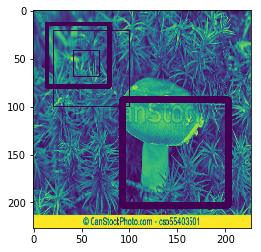

In [0]:
trig = 8
img = np.reshape(xtest[trig], (227,227))
img2 = img

box2 = boxte[trig]
box = pont[trig]
h = int(box[:, :, 2] * 227)
w = int(box[:, :, 3] * 227)
xmid = int(box[:, :, 0] * 227)
ymid = int(box[:, :, 1] * 227)
h2 = int(box2[:, :, 2] * 227)
w2 = int(box2[:, :, 3] * 227)
xmid2 = int(box2[:, :, 0] * 227)
ymid2 = int(box2[:, :, 1] * 227)

ymax = int(ymid + h/2)
ymin = int(ymid - h/2)
xmax = int(xmid + w/2)
xmin = int(xmid - w/2)
ymax2 = int(ymid2 + h2/2)
ymin2 = int(ymid2 - h2/2)
xmax2 = int(xmid2 + w2/2)
xmin2 = int(xmid2 - w2/2)
cv2.rectangle(img2,(xmin,ymax),(ymax,xmin),(0,0,255),1)
cv2.rectangle(img2,(xmin2,ymax2),(ymax2,xmin2),(0,255,0),3)

plt.imshow(img)
if classifcation[trig] == 0:
    name = 'nothing'
elif classifcation[trig] == 1:
    name = 'cucmber'
elif classifcation[trig] == 2:
    name = 'eggplant'
elif classifcation[trig] == 3:
    name = 'mushroom'

print(name)

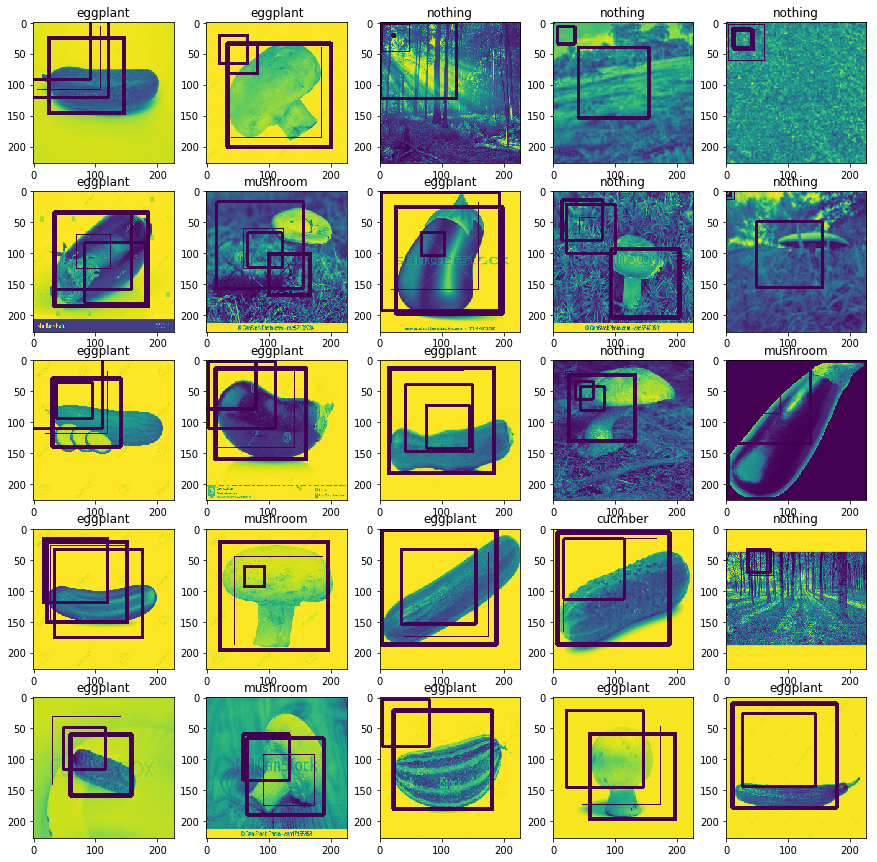

In [0]:
length = len(boxte)
cols = 5
rows = int(length/cols)

f, axs = plt.subplots(rows,cols,figsize=(15,15))

for i in range(25):
    trig = i
    img = np.reshape(xtest[trig], (227,227))
    img2 = img

    box2 = boxte[trig]
    box = pont[trig]
    h = int(box[:, :, 2] * 227)
    w = int(box[:, :, 3] * 227)
    xmid = int(box[:, :, 0] * 227)
    ymid = int(box[:, :, 1] * 227)
    h2 = int(box2[:, :, 2] * 227)
    w2 = int(box2[:, :, 3] * 227)
    xmid2 = int(box2[:, :, 0] * 227)
    ymid2 = int(box2[:, :, 1] * 227)

    ymax = int(ymid + h/2)
    ymin = int(ymid - h/2)
    xmax = int(xmid + w/2)
    xmin = int(xmid - w/2)
    ymax2 = int(ymid2 + h2/2)
    ymin2 = int(ymid2 - h2/2)
    xmax2 = int(xmid2 + w2/2)
    xmin2 = int(xmid2 - w2/2)
    cv2.rectangle(img2,(xmin,ymax),(ymax,xmin),(0,0,255),3)
    cv2.rectangle(img2,(xmin2,ymax2),(ymax2,xmin2),(0,255,0),5)

    
    if classifcation[trig] == 0:
        name = 'nothing'
    elif classifcation[trig] == 1:
        name = 'cucmber'
    elif classifcation[trig] == 2:
        name = 'eggplant'
    elif classifcation[trig] == 3:
        name = 'mushroom'
    
    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.title(name)

In [0]:
files = list(uploads2.keys())
test = []
for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(227,227))
    test.append(img)
test = np.array(test)/255
test = test[:, :, :, np.newaxis]
print(test.shape)

(16, 227, 227, 1)


In [0]:
data = model.predict(test, verbose = 1)

classifcation = [np.argmax(point) for point in data[0]]
print(np.array(classifcation))
clas = np.array(classifcation)

print('accuracy', counter/len(classte))
pont = data[1]

16/16 [==============================] - 0s 16ms/sample
[1 0 2 2 0 1 2 3 3 1 3 3 2 1 1 2]
accuracy 0.8


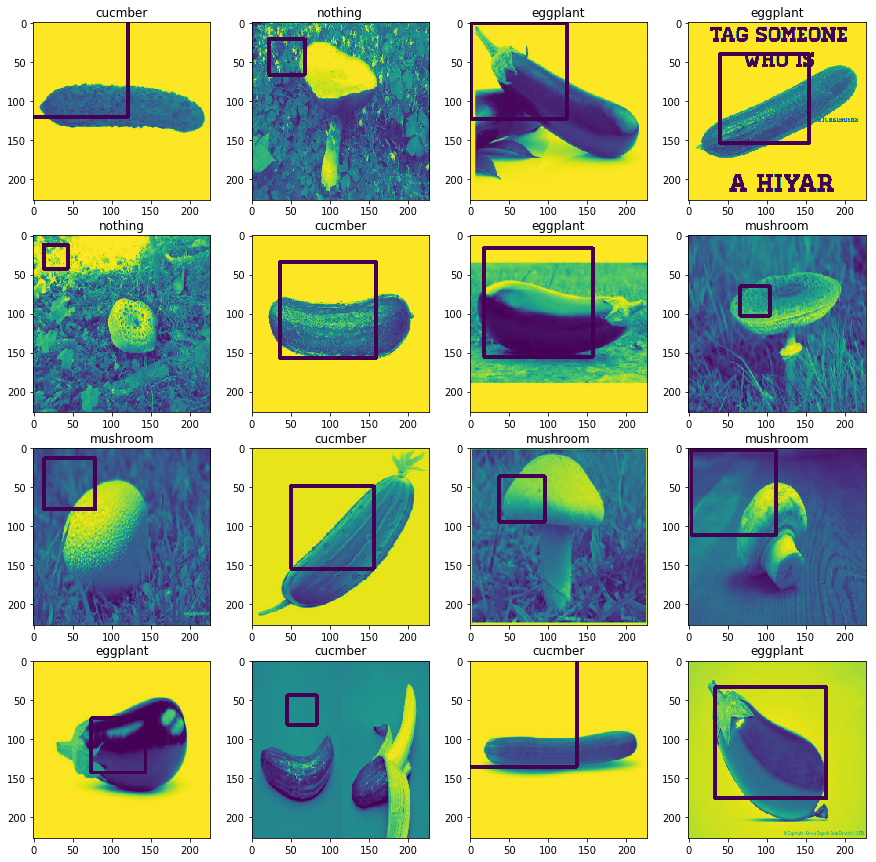

In [0]:
length = len(test)
cols = 4
rows = int(length/cols)

f, axs = plt.subplots(rows,cols,figsize=(15,15))

for i in range(16):
    trig = i
    img = np.reshape(test[trig], (227,227))
    img2 = img

    box = pont[trig]
    h = int(box[:, :, 2] * 227)
    w = int(box[:, :, 3] * 227)
    xmid = int(box[:, :, 0] * 227)
    ymid = int(box[:, :, 1] * 227)

    ymax = int(ymid + h/2)
    ymin = int(ymid - h/2)
    xmax = int(xmid + w/2)
    xmin = int(xmid - w/2)

    cv2.rectangle(img2,(xmin,ymax),(ymax,xmin),(0,0,255),3)
    
    if classifcation[trig] == 0:
        name = 'nothing'
    elif classifcation[trig] == 1:
        name = 'cucmber'
    elif classifcation[trig] == 2:
        name = 'eggplant'
    elif classifcation[trig] == 3:
        name = 'mushroom'
    
    
    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.title(name)

    #print(name)